In [ ]:
# importing necessary libraries
import librosa          # for audio processing
import librosa.display
import soundfile as sf # for reading and writing audio files
import matplotlib.pyplot as plt
import numpy as np
import os


STEP 1: Reading an Audio File

In [ ]:

# Read an audio file
audio_file = "data/476707__sergequadrado__fairy-logo.wav"  # Change this to your file name

# Load the audio
# data from librosa.load() is typically normalized by default to the range [-1, 1]
audio_data, sample_rate = librosa.load(audio_file)

In [ ]:
# sample_rate: how many samples per second (usually 22050 or 44100)
print(f"Sample Rate: {sample_rate} Hz")
#
print(f"Total samples: {len(audio_data)}")

print(f"Duration: {len(audio_data) / sample_rate:.2f} seconds")

Sample Rate: 22050 Hz
Total samples: 246658
Duration: 11.19 seconds


Data analysis

In [ ]:
print("shape: ",audio_data.shape)
print("data_type: ",type(audio_data))
print("first sample: ",audio_data[0])

shape:  (246658,)
data_type:  <class 'numpy.ndarray'>
first sample:  -5.1972775e-06


In [ ]:
# Get first few samples and format them nicely
samples = audio_data[0:5000]  # Getting same number of samples as your example
formatted_samples = [f"{x:.6f}" for x in samples]  # Format to 6 decimal places
print("First 50000 samples:", formatted_samples)

First 50 samples: ['-0.000005', '0.000005', '0.000010', '0.000001', '-0.000001', '0.000008', '-0.000001', '0.000005', '0.000001', '-0.000003', '0.000004', '-0.000005', '0.000007', '-0.000002', '0.000005', '-0.000008', '0.000005', '-0.000003', '0.000012', '0.000001', '0.000003', '0.000001', '-0.000003', '0.000007', '-0.000008', '0.000008', '-0.000004', '0.000003', '0.000000', '0.000007', '-0.000002', '0.000005', '-0.000005', '0.000006', '0.000014', '-0.000005', '0.000002', '-0.000003', '-0.000001', '-0.000002', '-0.000002', '-0.000002', '-0.000001', '0.000003', '-0.000001', '-0.000004', '0.000006', '-0.000002', '0.000004', '-0.000001', '-0.000006', '-0.000000', '0.000001', '0.000001', '0.000000', '-0.000001', '-0.000003', '0.000008', '-0.000004', '0.000002', '0.000004', '-0.000004', '0.000006', '-0.000004', '0.000002', '0.000003', '0.000003', '0.000007', '-0.000003', '0.000001', '-0.000004', '-0.000004', '0.000005', '0.000001', '-0.000000', '0.000000', '-0.000000', '-0.000000', '-0.0000

Data Visualisation 

1: Waveform (Time Domain)

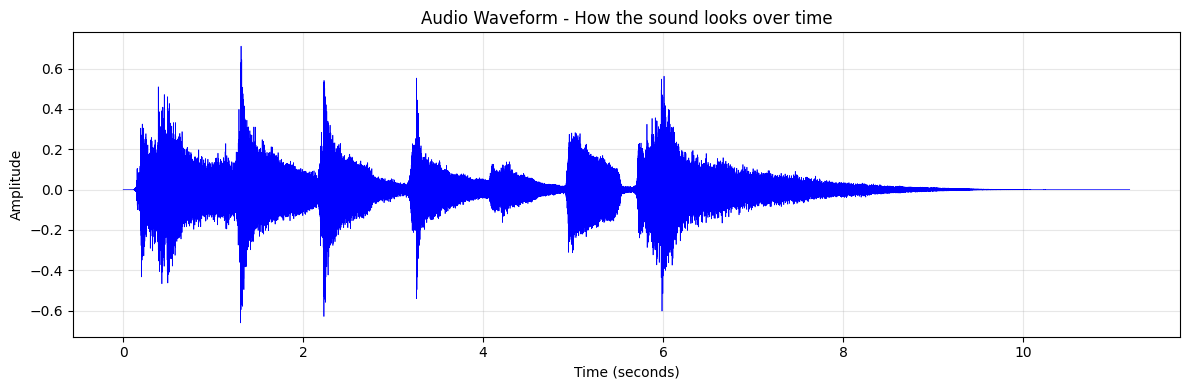


Waveform plot displayed!
- X-axis: Time in seconds
- Y-axis: Amplitude (loudness at each moment)


In [ ]:
# ============================================
# 
# ============================================
plt.figure(figsize=(12, 4))

# Create time axis
time = np.linspace(0, len(audio_data) / sample_rate, len(audio_data))

plt.plot(time, audio_data, color='blue', linewidth=0.5)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform - How the sound looks over time')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nWaveform plot displayed!")
print("- X-axis: Time in seconds")
print("- Y-axis: Amplitude (loudness at each moment)")


2. histogram


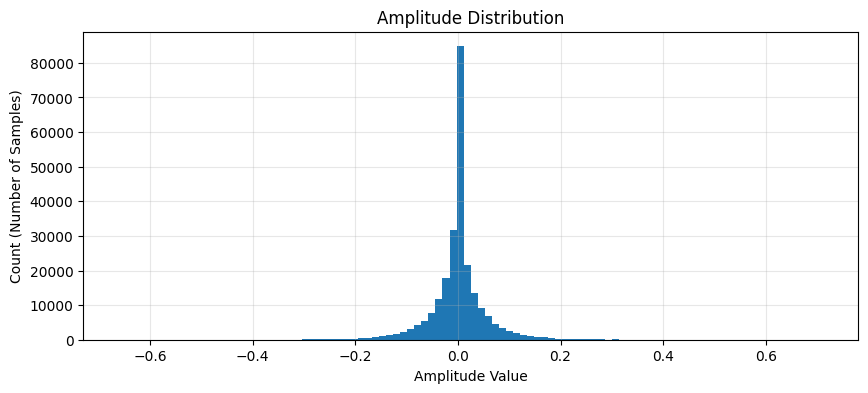

In [30]:
plt.figure(figsize=(10, 4))
plt.hist(audio_data, bins=100)
plt.title('Amplitude Distribution')
plt.xlabel('Amplitude Value')
plt.ylabel('Count (Number of Samples)')  # Changed from "Frequency" to be clearer
plt.grid(True, alpha=0.3)
plt.show()


3: Spectrogram (Frequency over Time)

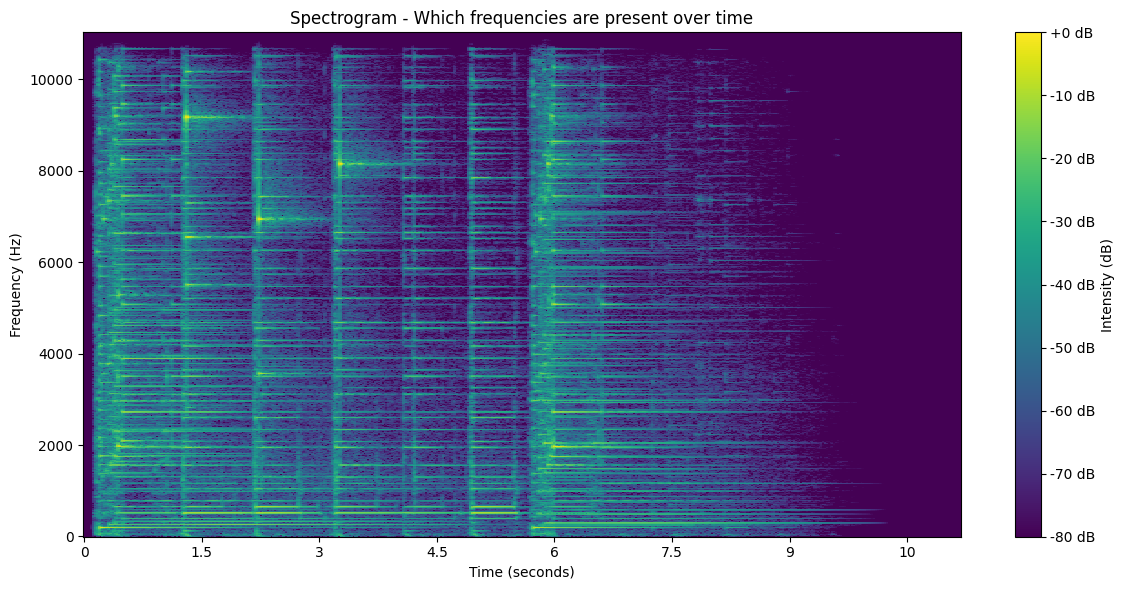


Spectrogram plot displayed!
- X-axis: Time in seconds
- Y-axis: Frequency in Hz
- Colors: Brightness shows intensity (yellow=loud, dark=quiet)


In [29]:
plt.figure(figsize=(12, 6))

# Create spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref=np.max)

librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='hz', cmap='viridis')
plt.colorbar(format='%+2.0f dB', label='Intensity (dB)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram - Which frequencies are present over time')
plt.tight_layout()
plt.show()

print("\nSpectrogram plot displayed!")
print("- X-axis: Time in seconds")
print("- Y-axis: Frequency in Hz")
print("- Colors: Brightness shows intensity (yellow=loud, dark=quiet)")

Change Volume

In [34]:
# Make it louder (multiply by factor > 1)
louder_audio = audio_data * 2.0  # 2x louder
print("\n✓ Created louder version (2x volume)")

# Make it quieter (multiply by factor < 1)
quieter_audio = audio_data * 0.5  # Half volume
print("✓ Created quieter version (0.5x volume)")

# Normalize (make it as loud as possible without distortion)
max_value = np.max(np.abs(audio_data))
normalized_audio = audio_data / max_value
print("✓ Created normalized version (maximum volume without clipping)")

# ============================================
# SAVE THE MODIFIED AUDIO
# ============================================

output_dir = "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"📁 Created directory: {output_dir}/")

# Save louder version
sf.write(os.path.join(output_dir, 'louder_audio.wav'), louder_audio, sample_rate)
print(f"\n📁 Saved: {os.path.join(output_dir, 'louder_audio.wav')}")

# Save quieter version
sf.write(os.path.join(output_dir, 'quieter_audio.wav'), quieter_audio, sample_rate)
print(f"📁 Saved: {os.path.join(output_dir, 'quieter_audio.wav')}")

# Save normalized version
sf.write(os.path.join(output_dir, 'normalized_audio.wav'), normalized_audio, sample_rate)
print(f"📁 Saved: {os.path.join(output_dir, 'normalized_audio.wav')}")



✓ Created louder version (2x volume)
✓ Created quieter version (0.5x volume)
✓ Created normalized version (maximum volume without clipping)
📁 Created directory: output/

📁 Saved: output/louder_audio.wav
📁 Saved: output/quieter_audio.wav
📁 Saved: output/normalized_audio.wav
